<a href="https://colab.research.google.com/github/Firizki17/Machine-Learning/blob/main/Data_Wine_ROC_and_AUC_Firizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation ROC and AUC**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Importing the dataset
# Replace with the actual path to your file
dataset = pd.read_csv('Wine_dataset.csv')
dataset.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_test = sc.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(C=2)
model_logistic.fit(x_train,y_train)

y_pred_logistic = model_logistic.predict(x_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)
dt.fit(x_train,y_train)

y_pred_tree = dt.predict_proba(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(x_train,y_train)

y_pred_forest = rfr.predict_proba(x_test)

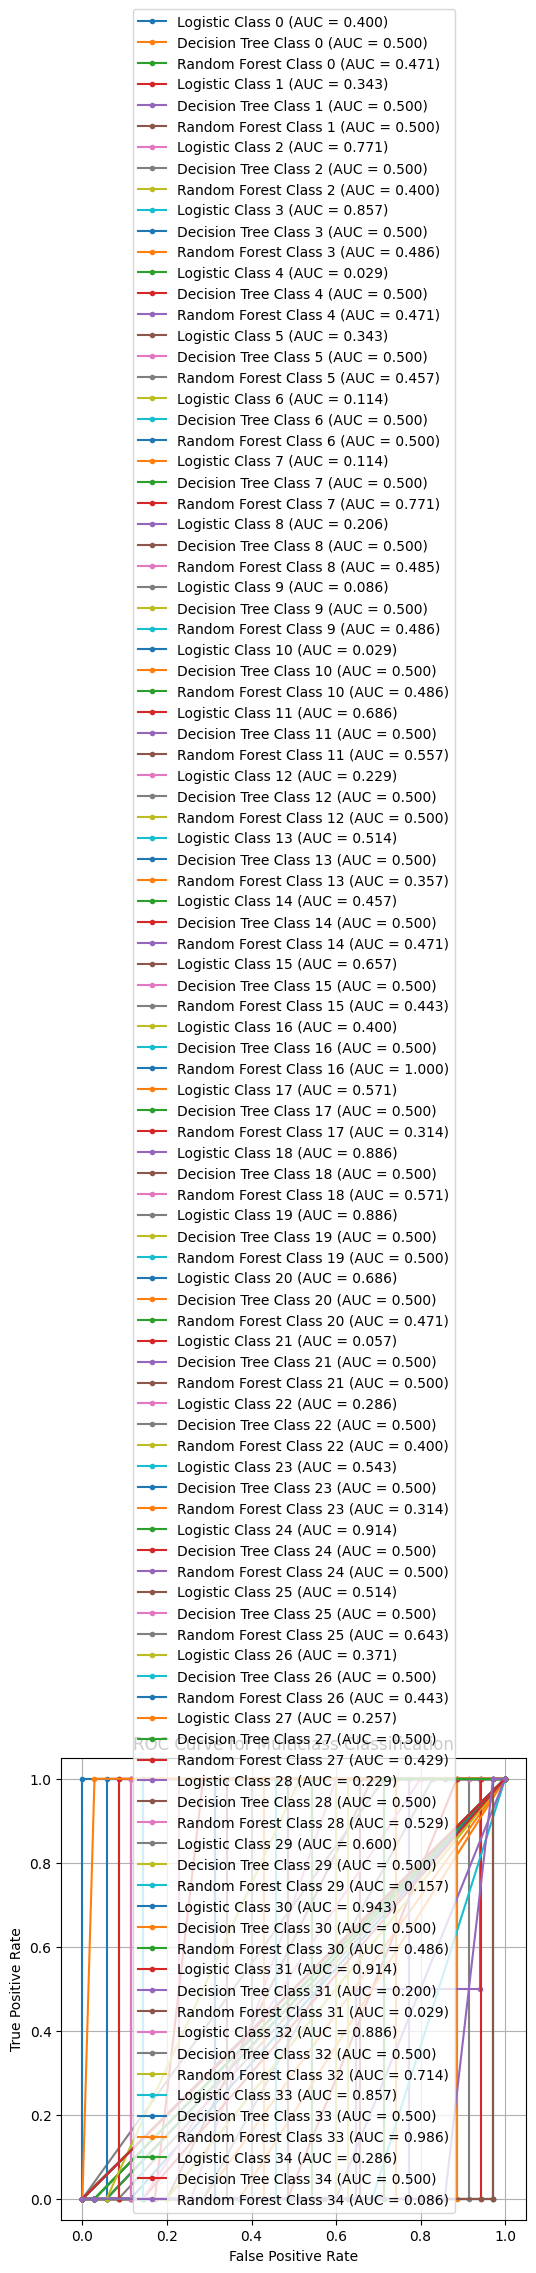

In [46]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarisasi y_test menjadi one-hot encoding
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Mengubah ke one-hot encoding

# Prediksi probabilitas untuk semua kelas
y_pred_logistic = model_logistic.predict_proba(x_test)
y_pred_tree = dt.predict_proba(x_test)
y_pred_forest = rfr.predict_proba(x_test)

# Inisialisasi plot ROC
plt.figure(figsize=(6,6), dpi=100)

# Loop untuk setiap kelas
for i in range(n_classes):
    logistic_fpr, logistic_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_logistic[:, i])
    auc_logistic = auc(logistic_fpr, logistic_tpr)

    dt_fpr, dt_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_tree[:, i])
    auc_dt = auc(dt_fpr, dt_tpr)

    rfr_fpr, rfr_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_forest[:, i])
    auc_rfr = auc(rfr_fpr, rfr_tpr)

    plt.plot(logistic_fpr, logistic_tpr, marker=".", label=f'Logistic Class {i} (AUC = {auc_logistic:.3f})')
    plt.plot(dt_fpr, dt_tpr, marker=".", label=f'Decision Tree Class {i} (AUC = {auc_dt:.3f})')
    plt.plot(rfr_fpr, rfr_tpr, marker=".", label=f'Random Forest Class {i} (AUC = {auc_rfr:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.grid()
plt.show()
